## Objectives

The primary objective of this bakery sales analysis is to identify key patterns and trends in customer purchasing behavior across different times of the day, week, and year.

By examining transaction data based on item type, daypart, day type, and month, this study aims to uncover insights that can inform targeted marketing strategies, optimize inventory management, and enhance overall operational efficiency. The analysis also seeks to identify top-selling items during various periods, providing actionable recommendations to increase sales and customer satisfaction throughout the year.

## Dataset Source

The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. The dataset provides the transaction details of customers who ordered different items from this bakery online during the time period from October 2016 to September 2017.

Source URL: https://www.kaggle.com/datasets/akashdeepkuila/bakery

## Preparing the Dataset

In [ ]:
# loading packages

library(tidyverse)

list.files(path = "../input")

library(dplyr)

library(skimr)

library(ggplot2)

library(lubridate)

In [ ]:
# import dataset

bakery <- read_csv('/kaggle/input/bakery/Bakery.csv')

head(bakery)

In [ ]:
# remove rows with null values

bakery_clean <- bakery %>% drop_na()

glimpse(bakery_clean)

## 1. Product Performance by Daypart

In [ ]:
# determine the top items per daypart

daypart_product_count <- bakery_clean %>%
    group_by(Daypart, Items) %>%
    summarise(count = n(), .groups = 'drop_last') %>%
    arrange(Daypart, desc(count)) %>%
    slice_max(order_by = count, n = 5)

print(daypart_product_count)

In [ ]:
# visualize the top items per daypart

ggplot(daypart_product_count, aes(x = fct_reorder(Items, -count), y = count, fill = Items)) +
    geom_bar(stat = "identity") +
    facet_wrap(~Daypart, scales = "free", ncol = 1) +
    labs(title = "Top 5 Most Frequently Bought Items per Daypart", x = "Item Type", y = "Count") +
    theme_minimal()

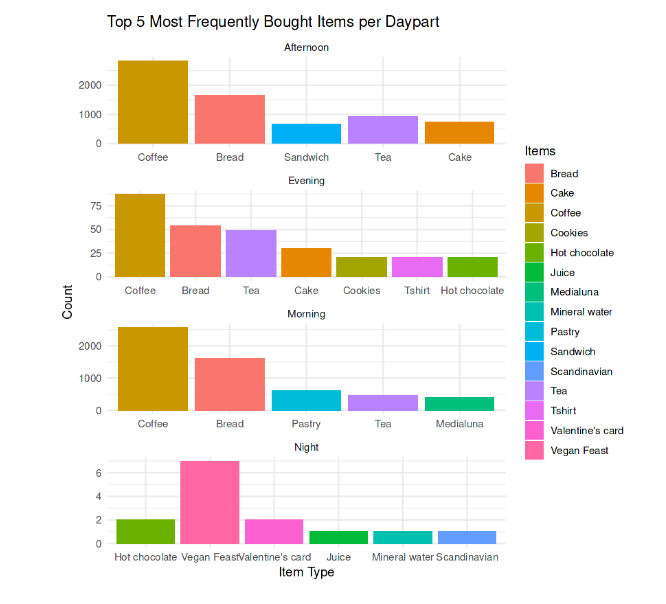

### Insights:

Based on the analysis of bakery product sales per daypart, it’s clear that certain items are consistently popular throughout the day. Coffee and bread are the top sellers in the morning, afternoon, and evening, highlighting their universal appeal.

Pastry and medialuna are more popular in the morning, likely as breakfast items, while sandwiches and cakes gain traction in the afternoon.

The evening shows a more diverse preference, with items like hot chocolate and even non-food items like t-shirts making the list, possibly due to bundled promotions or impulse buys.

The late-night results appear unreliable due to insufficient transaction data, suggesting that this time period may not be as crucial for product sales or may require further dataset investigation.

Overall, the insights could help the bakery focus on stocking popular items during specific times of the day to optimize sales.

## 2. Product Performance by Day Type

In [ ]:
# determine the top items per day type

daytype_product_count <- bakery_clean %>%
    group_by(DayType, Items) %>%
    summarise(count = n(), .groups = 'drop_last') %>%
    arrange(DayType, desc(count)) %>%
    slice_max(order_by = count, n = 5)

print(daytype_product_count)

In [ ]:
# visualize the top items per day type

ggplot(daytype_product_count, aes(x = fct_reorder(Items, -count), y = count, fill = Items)) +
    geom_bar(stat = "identity") +
    facet_wrap(~DayType, scales = "free", ncol = 1) +
    labs(title = "Top 5 Most Frequently Bought Items per Day Type", x = "Item Type", y = "Count") +
    theme_minimal()

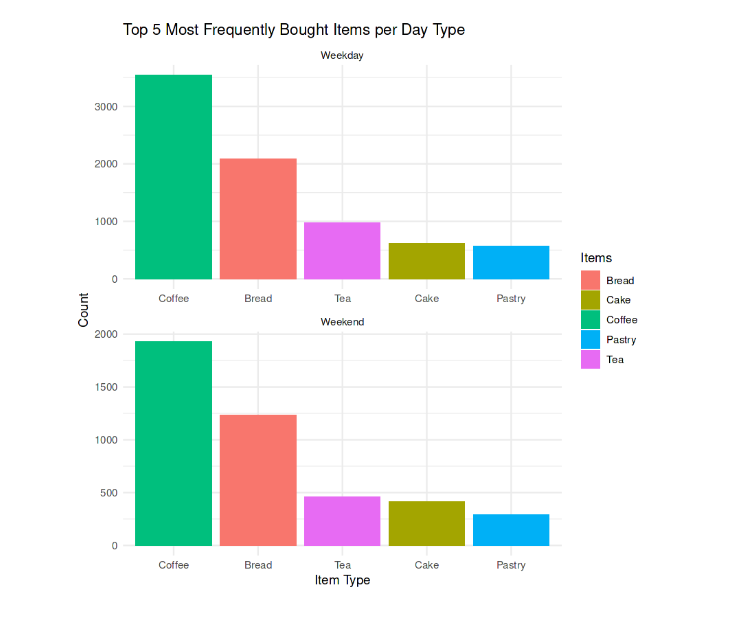

### Insights:

The analysis of bakery product sales by daypart revealed a consistent pattern in customer preferences, both on weekdays and weekends. The top 5 most purchased items — coffee, bread, tea, cake, and pastry — are the same regardless of the day. This suggests that these items have a strong and steady demand throughout the week. The consistency in preferences could indicate that these products are staples for customers, likely contributing to the bakery's core revenue.

To maximize sales, the bakery could focus on ensuring these popular items are always well-stocked and perhaps consider promotions that bundle these items together to further drive customer engagement.

## 3. Weekday vs Weekend Sales Performance

In [ ]:
# determine the ratio of sales between weekdays and weekends for each item type

# summarize sales by day type and item type

sales_comparison <- bakery_clean %>%
    group_by(DayType, Items) %>%
    summarise(total_transactions = n(), .groups = 'drop_last') %>%
    arrange(DayType, desc(total_transactions))

# spread the day type into separate columns for weekdays and weekends

sales_wide <- sales_comparison %>%
    spread(key = DayType, value = total_transactions, fill = 0)

# calculate the ratio of weekend to weekday sales

sales_wide <- sales_wide %>%
    mutate(ratio_weekend_weekday = ifelse(Weekday > 0, Weekend / Weekday, NA))

# filter the results to top 5 items

filtered_sales <- sales_wide %>%
    filter(Items %in% c("Coffee", "Bread", "Tea", "Cake", "Pastry")) %>%
    arrange(desc(Weekday))

# view the result

print(filtered_sales)

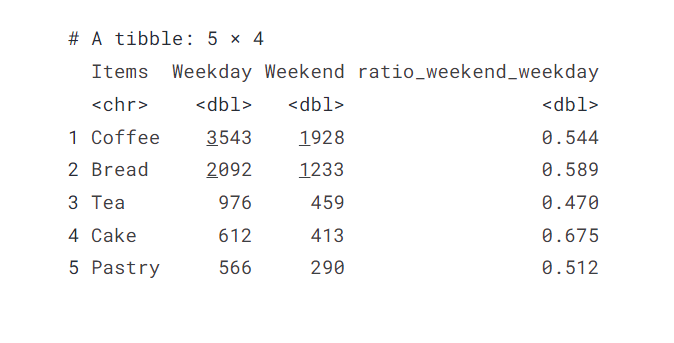

### Insights

The ratios of weekend to weekday transactions for the top 5 bakery items range from 0.512 to 0.675. This means that on average, these items are purchased more often on weekdays than on weekends.

However, the highest ratio of 0.675, observed for cakes, indicates that 67.5% of the cakes sold on weekdays are also sold on weekends. This suggests that cakes are a relatively more popular item during weekends compared to the other items analyzed.

Given that more cakes are sold on weekends than weekdays, we can provide the following recommendations:

1. Weekend Promotions: Implement special promotions or discounts on cakes during the weekend to capitalize on their popularity.
2. Weekend Special Menus: Introduce exclusive weekend-only cake varieties or themed cakes that cater to weekend events like parties.
3. Bulk Ordering Options: Offer bulk ordering or pre-order options for cakes over the weekend.
4. Stock Management: Ensure that the bakery is well-stocked with a variety of cakes during the weekend.

## 4. Monthly Sales Analysis

In [ ]:
# extract the month data from the DateTime column

bakery_clean <- bakery_clean %>%
    mutate(month = format(DateTime, "%m"))

head(bakery_clean)

In [ ]:
# determine the total transactions of all items per month

monthly_transactions <- bakery_clean %>%
    group_by(month) %>%
    summarise(total_transactions = n(), .groups = 'drop_last')


print(monthly_transactions)

In [ ]:
# visualize the monthly transactions dataset

ggplot(monthly_transactions, aes(x = month, y = total_transactions, group = 1)) +
    geom_line(color = "blue") +
    geom_point(color = "red") +
    labs(title = "Total Transactions per Month", x = "Month", y = "Total Transactions")

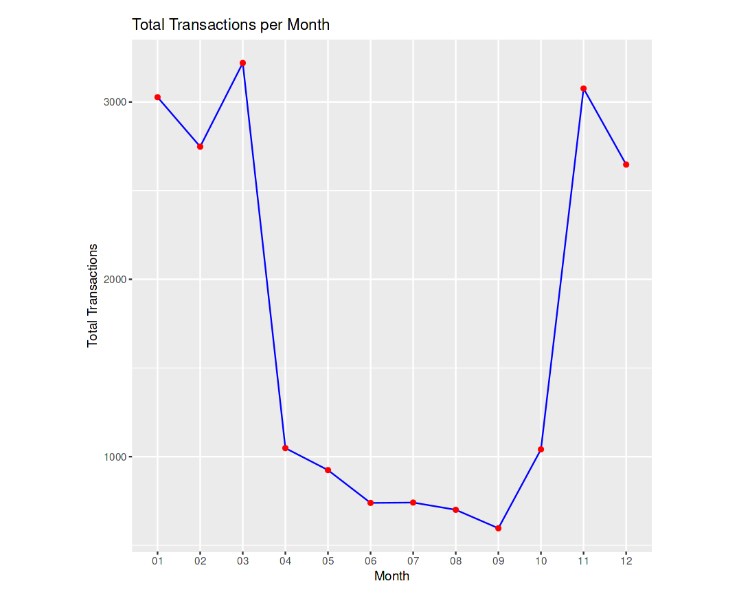

### Insights:

The high transaction volumes from January to March and again from November to December likely correspond to the holiday seasons and colder months, where people may be more inclined to buy coffee and baked goods. The significant decrease from April to October might reflect warmer weather, when coffee and hot baked goods are less preferred, or when people are more likely to be away on vacations, reducing foot traffic in bakeries.

### Recommendations:

1. Seasonal Promotions: Increase marketing efforts and promotional campaigns during the high-sales periods (January-March, November-December) to capitalize on the natural uptick in customer demand. Special holiday-themed products and limited-time offers could be highly effective.

2. Off-Season Strategies: To mitigate the sales dip from April to October, consider introducing products that cater to the season, such as light, summer-friendly baked goods or cold beverages. Additionally, offering discounts or loyalty programs could help maintain customer interest during these slower months.

3. Inventory Management: Adjust inventory levels and staffing according to these seasonal patterns to optimize operational efficiency and reduce waste. For instance, increase stock and workforce during high-sales months and scale back during the off-season.

4. Product Innovation: Explore launching new product lines or services (like catering or online delivery) to attract different customer segments during the slower months, potentially balancing the sales across the year.